# Ejercicio Práctico con Pandas

## Objetivo: Explorar y analizar el conjunto de datos de pesos y alturas.
### Parte 1: Exploración Básica del DataFrame

    Cargar el archivo CSV en un DataFrame de Pandas.
    Explorar el DataFrame:
        Mostrar las primeras y últimas 5 filas del DataFrame.
        Obtener información general del DataFrame, como el número de filas, columnas y tipos de datos.
        Calcular estadísticas descriptivas básicas para las columnas numéricas (media, mediana, desviación estándar, mínimos y máximos).

### Parte 2: Limpieza y Preparación de Datos

    Convertir la altura de pulgadas a centímetros.
    Convertir el peso de libras a kilogramos.
    Tratar con valores faltantes (si los hay): Identificar y manejar los valores faltantes en el conjunto de datos.

#### Parte 3: Análisis Exploratorio de Datos

    Agrupar datos por género y calcular el peso medio para cada género.
    Visualización:
        Crear histogramas de las distribuciones de altura y peso.
        Crear un diagrama de caja (boxplot) para comparar la distribución del peso entre géneros.
    Filtrar datos para un rango de altura específico y calcular estadísticas descriptivas.

### Parte 4: Operaciones Avanzadas

    Calcular los percentiles del peso para cada género.
    Crear una nueva columna que clasifique a los individuos como 'Bajo Peso', 'Peso Normal', 'Sobrepeso' o 'Obesidad' basado en su IMC (Índice de Masa Corporal).

### Parte 5: Exportar Resultados

    Guardar los resultados del análisis en un nuevo archivo CSV.

In [ ]:
import pandas as pd
URL = "https://drive.google.com/uc?export=download&id=1-zKKm5aEEabJS01n4vZhE8iiacnXYWGg"
df = pd.read_csv(URL)
print(df.head(15).to_string(index=False))

Gender    Height     Weight
  Male 73.847017 241.893563
  Male 68.781904 162.310473
  Male 74.110105 212.740856
  Male 71.730978 220.042470
  Male 69.881796 206.349801
  Male 67.253016 152.212156
  Male 68.785081 183.927889
  Male 68.348516 167.971110
  Male 67.018950 175.929440
  Male 63.456494 156.399676
  Male 71.195382 186.604926
  Male 71.640805 213.741169
  Male 64.766329 167.127461
  Male 69.283070 189.446181
  Male 69.243732 186.434168


In [ ]:
print(df.head().to_string(index=False))
print("-------------------------------")
print(df.tail().to_string(index=False))
print("-------------------------------")
print(df.info())
print("-------------------------------")
print(df.describe())

Gender    Height     Weight
  Male 73.847017 241.893563
  Male 68.781904 162.310473
  Male 74.110105 212.740856
  Male 71.730978 220.042470
  Male 69.881796 206.349801
-------------------------------
Gender    Height     Weight
Female 66.172652 136.777454
Female 67.067155 170.867906
Female 63.867992 128.475319
Female 69.034243 163.852461
Female 61.944246 113.649103
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  9998 non-null   float64
 2   Weight  9998 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
None
-------------------------------
            Height       Weight
count  9998.000000  9998.000000
mean     66.366788   161.434302
std       3.847510    32.108770
min      54.263133    64.700127
25%      63.505073   135.815966
50%      66.317827   161.

In [ ]:
pulgadaToCm = 2.54
librasToKg = 0.45

df['Height'] = df['Height'] * pulgadaToCm
print(df.head())
print("----------------------------")
df['Weight'] = df['Weight'] * librasToKg
print(df.head())

  Gender      Height      Weight
0   Male  187.571423  241.893563
1   Male  174.706036  162.310473
2   Male  188.239668  212.740856
3   Male  182.196685  220.042470
4   Male  177.499761  206.349801
----------------------------
  Gender      Height      Weight
0   Male  187.571423  108.852103
1   Male  174.706036   73.039713
2   Male  188.239668   95.733385
3   Male  182.196685   99.019112
4   Male  177.499761   92.857410


In [ ]:
print("Nulls en el DataFrame:")
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

Nulls en el DataFrame:
Gender    0
Height    2
Weight    2
dtype: int64
Gender    0
Height    0
Weight    0
dtype: int64


<ipython-input-30-1ac9c70132c1>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
peso_promedio = df.groupby('Gender')['Weight'].mean()
print("Peso promedio: ", peso_promedio)

Peso promedio:  Gender
Female    61.137042
Male      84.153830
Name: Weight, dtype: float64


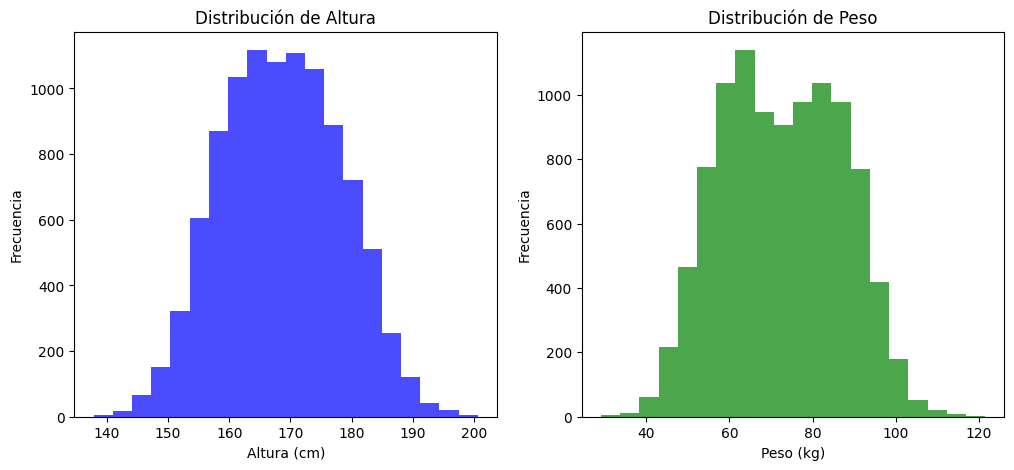

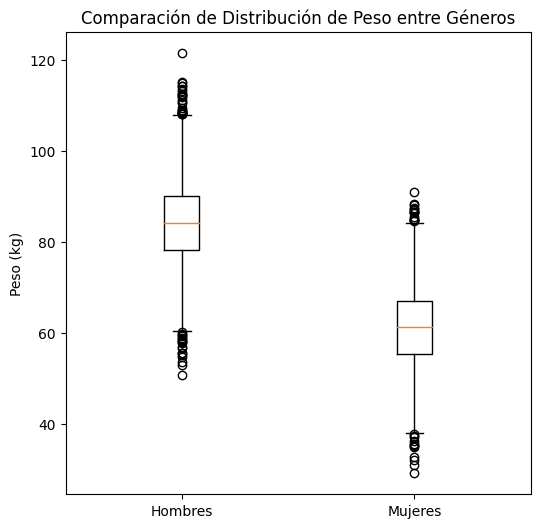

In [ ]:
import matplotlib.pyplot as plt
# Crear histogramas de las distribuciones de altura y peso
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Height'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['Weight'], bins=20, color='green', alpha=0.7)
plt.title('Distribución de Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')

# Crear un diagrama de caja para comparar la distribución del peso entre géneros
plt.figure(figsize=(6, 6))
plt.boxplot([df[df['Gender'] == 'Male']['Weight'],
             df[df['Gender'] == 'Female']['Weight']],
            labels=['Hombres', 'Mujeres'])
plt.title('Comparación de Distribución de Peso entre Géneros')
plt.ylabel('Peso (kg)')

plt.show()

In [ ]:
altura_filtrada = df[(df['Height'] >= 160) & (df['Height'] <= 180)]
print("Estadísticas altura entre 160 y 180 cm:", altura_filtrada['Height'].describe())

Estadísticas altura entre 160 y 180 cm: count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Height, dtype: float64


In [ ]:
percentiles_peso = df.groupby('Gender')['Weight'].quantile([0.25, 0.5, 0.75])
print("\nPercentiles del peso por género:")
print(percentiles_peso)


Percentiles del peso por género:
Gender      
Female  0.25    312.252604
        0.50    345.738661
        0.75    377.979753
Male    0.25    441.627143
        0.50    475.043816
        0.75    508.908817
Name: Weight, dtype: float64


In [ ]:
df['imc'] = df['Height'] / ((df['Weight'] / 100) ** 2)

def clasificar_imc(imc):
    if imc < 18.5:
        return 'Bajo Peso'
    elif 18.5 <= imc < 25:
        return 'Peso Normal'
    elif 25 <= imc < 30:
        return 'Sobrepeso'
    else:
        return 'Obesidad'

df['clasificacion_imc'] = df['imc'].apply(clasificar_imc)
df['clasificacion_imc'].value_counts()

Obesidad       3719
Peso Normal    3031
Bajo Peso      1809
Sobrepeso      1441
Name: clasificacion_imc, dtype: int64

In [ ]:
df.to_csv('resultados.csv', index=False)